### Importing all the required libraries

In [1]:
# Importing the libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

### Data Preprocessing

In [2]:
# reading the dataframe
dataset=pd.read_csv("Admission_Predict_Ver1.1.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# It seems as though Serial No. is just an index for students, which we can take out.
dataset.drop(labels='Serial No.', axis=1, inplace=True)

In [4]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Exploratory data analysis

In [5]:
# Taking care of missing data
print(dataset.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


### As we can see there is no missing data so no need to take care of that

In [6]:
dataset.info() # checking information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
dataset.dtypes #checking for datatype of columns

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
# Two columns also have an added space in the label which we'll take out
dataset.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)

# Data Visualization

#### Let's plot a heatmap to see the correlation of all the features compared to Chance to Admit:

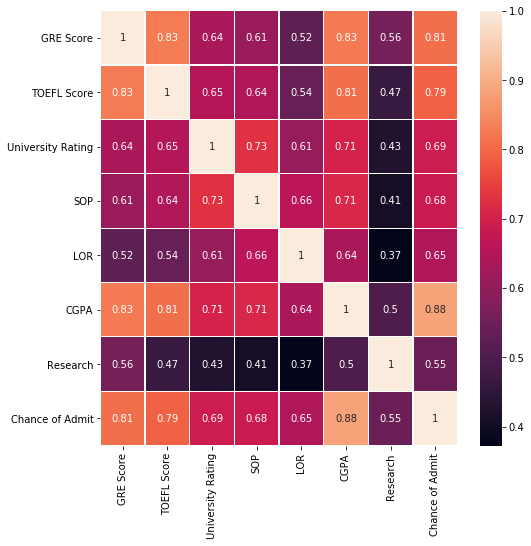

In [10]:
plt.figure(figsize=(8,8))
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,linewidths=.2)

The top three features that affect the Chance of Admit are:
1. CGPA
2. GRE Score
3. TOEFL Score

Let's explore these three features to get a better understanding.


#### CGPA
The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

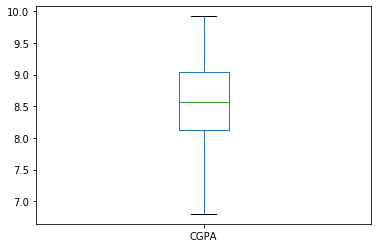

In [11]:
# Checking for outliers using boxplot
dataset[['CGPA']].boxplot(grid=False)

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

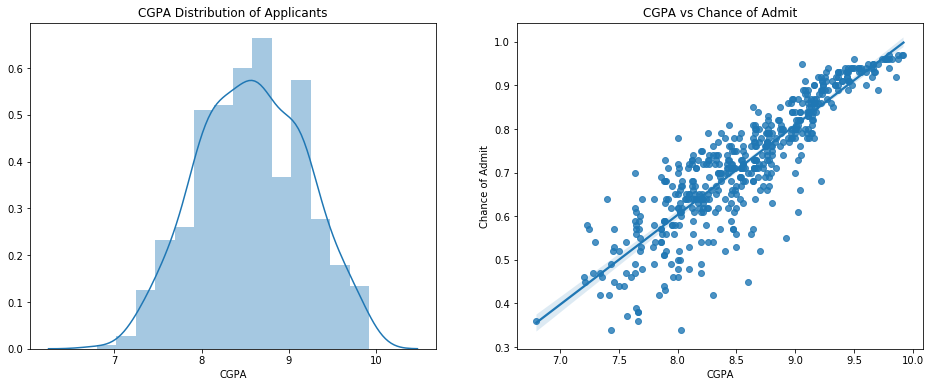

In [12]:
# Plotting distribution and regression plot for CGPA
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(dataset['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(dataset['CGPA'], dataset['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

#### GRE Score
The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally.

In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.

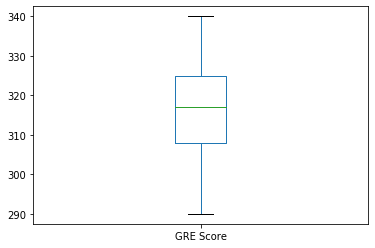

In [13]:
dataset[['GRE Score']].boxplot(grid=False)

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

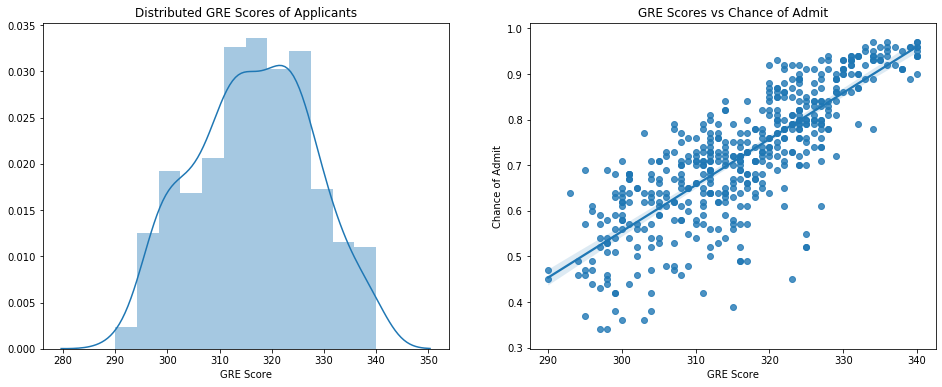

In [14]:
# Plotting distribution and regression plot for GRE Score
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(dataset['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(dataset['GRE Score'], dataset['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

#### TOEFL Score
The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

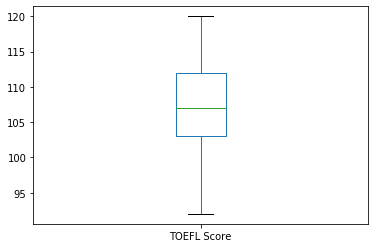

In [15]:
dataset[['TOEFL Score']].boxplot(grid=False)

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

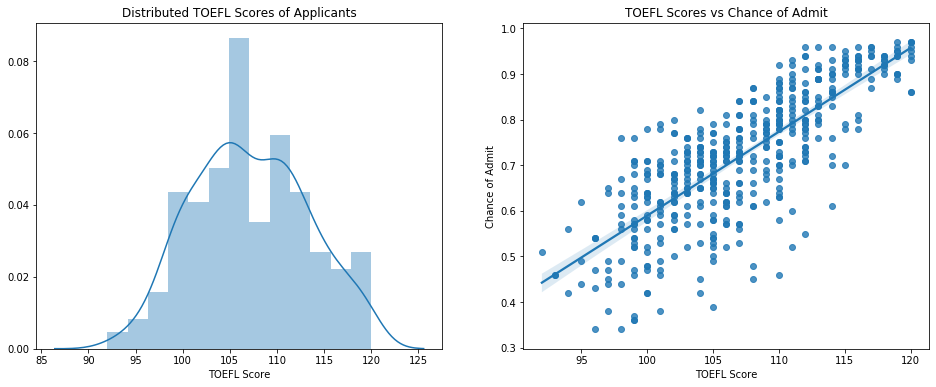

In [16]:
# Plotting distribution and regression plot for TOEFL Score
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(dataset['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(dataset['TOEFL Score'], dataset['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

#### Let's explore how many applicants have research experience.

[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

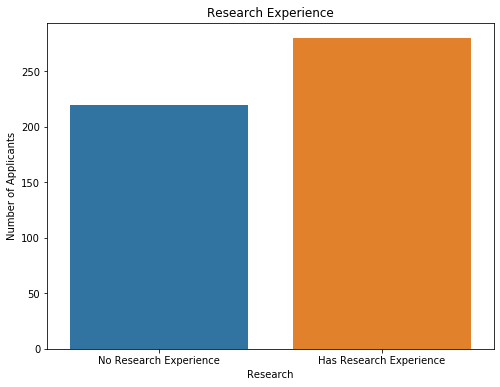

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(dataset['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

It seems the majority of applicants have research experience.

#### Lets explore LOR and SOP using countplot

Text(0, 0.5, 'Number of Applicants')

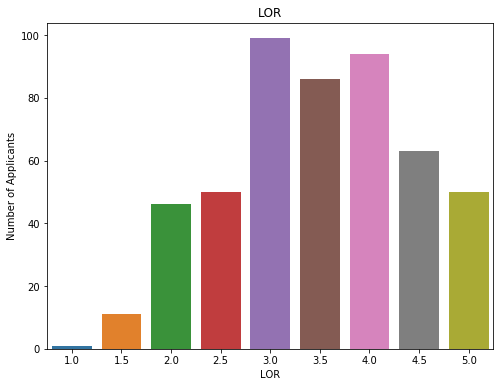

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(dataset['LOR'])
plt.title('LOR')
plt.ylabel('Number of Applicants')

Text(0, 0.5, 'Number of Applicants')

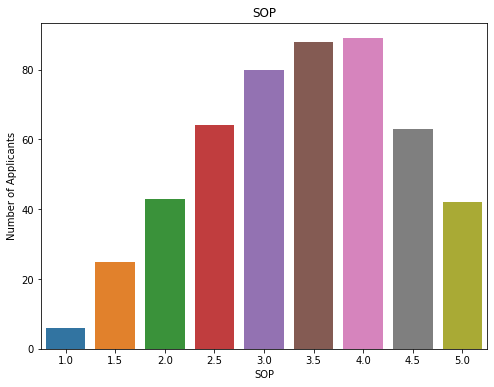

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(dataset['SOP'])
plt.title('SOP')
plt.ylabel('Number of Applicants')

#### Let's see the distribution of university rating.

Text(0, 0.5, 'Number of Applicants')

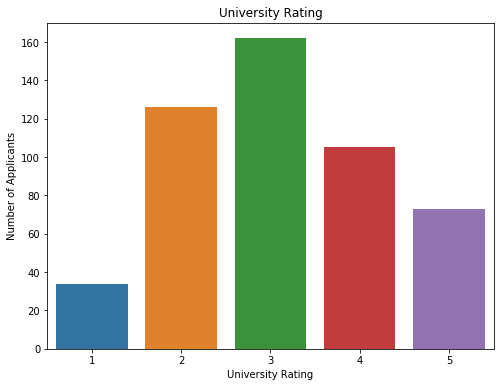

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(dataset['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

## Preparing Data for Machine Learning

Now that we understand our dataset, it's time to implement machine learning methods to predict future applicant's chances of admission.

### Seperating independent and dependent variables

In [21]:
x=dataset.iloc[:,:-1].values # independent variables
y=dataset.iloc[:,-1].values # target variable
print(x)
# print(y)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]


In [22]:
print(x.shape)

(500, 7)


In [23]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [24]:
# Scaling our data, from 0 to 1, to receive more accurate predictions
x = StandardScaler().fit_transform(x)
print(x)

[[ 1.81923762  1.77886545  0.77558214 ...  1.09894429  1.77680627
   0.88640526]
 [ 0.66714832 -0.03160087  0.77558214 ...  1.09894429  0.48585943
   0.88640526]
 [-0.0418297  -0.52536441 -0.09979274 ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.19888185  2.10804114  1.65095702 ...  1.63976333  1.62785086
   0.88640526]
 [-0.39631872 -0.68995225  0.77558214 ...  1.63976333 -0.24236699
  -1.12815215]
 [ 0.93301508  0.95592621  0.77558214 ...  1.09894429  0.76721964
  -1.12815215]]


### Splitting the dataset into training and test set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [26]:
# print(x_train)
print(x_train.shape)

(400, 7)


In [27]:
# print(x_test)
print(x_test.shape)

(100, 7)


In [28]:
# print(y_train)
print(y_train.shape)

(400,)


In [29]:
# print(y_test)
print(y_test.shape)

(100,)


### Now we'll implement machine learning algorithms to predict the chance of admission.

### Implementing Multiple Linear Regession (MLR)

In [30]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred=regressor.predict(x_test)
# print(y_pred)
print(y_pred.shape)

(100,)


### Analyzing the results

Text(0.5, 1.0, 'Visualizing the model performance for MLR')

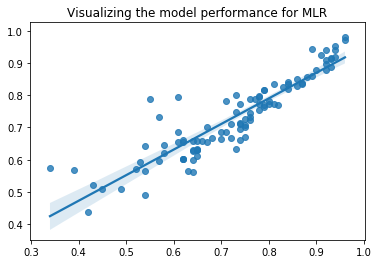

In [32]:
sns.regplot(y_test, y_pred)
plt.title('Visualizing the model performance for MLR')

In [33]:
# Comparing actual and predicted values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0.65 0.62]
 [0.7  0.75]
 [0.94 0.89]
 [0.73 0.57]
 [0.82 0.79]
 [0.67 0.7 ]
 [0.75 0.76]
 [0.71 0.74]
 [0.79 0.77]
 [0.66 0.64]
 [0.67 0.72]
 [0.56 0.64]
 [0.78 0.71]
 [0.8  0.61]
 [0.77 0.74]
 [0.86 0.88]
 [0.63 0.64]
 [0.76 0.79]
 [0.9  0.92]
 [0.67 0.75]
 [0.63 0.64]
 [0.79 0.78]
 [0.84 0.84]
 [0.59 0.53]
 [0.79 0.55]
 [0.57 0.39]
 [0.95 0.94]
 [0.64 0.58]
 [0.86 0.89]
 [0.71 0.72]
 [0.63 0.73]
 [0.82 0.79]
 [0.6  0.64]
 [0.91 0.92]
 [0.51 0.49]
 [0.82 0.84]
 [0.69 0.7 ]
 [0.63 0.65]
 [0.66 0.66]
 [0.91 0.93]
 [0.57 0.63]
 [0.66 0.74]
 [0.77 0.78]
 [0.97 0.96]
 [0.77 0.8 ]
 [0.52 0.43]
 [0.67 0.68]
 [0.63 0.65]
 [0.65 0.61]
 [0.66 0.62]
 [0.83 0.81]
 [0.92 0.94]
 [0.88 0.9 ]
 [0.62 0.58]
 [0.77 0.79]
 [0.64 0.54]
 [0.75 0.73]
 [0.6  0.62]
 [0.66 0.65]
 [0.7  0.74]
 [0.44 0.42]
 [0.72 0.76]
 [0.75 0.78]
 [0.85 0.86]
 [0.98 0.96]
 [0.61 0.65]
 [0.73 0.76]
 [0.77 0.81]
 [0.94 0.94]
 [0.7  0.67]
 [0.6  0.62]
 [0.65 0.67]
 [0.82 0.83]
 [0.49 0.54]
 [0.93 0.91]
 [0.6  0.57]
 [0.84 0.87]

In [34]:
# Regression metrics for MLR
mlr_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)*100
mlr_rmse = math.sqrt(mlr_mse)
mlr_r2 = r2_score(y_test,y_pred)
print(mlr_mse)
print(mlr_rmse)
print(mlr_r2)

0.34590988971363834
0.588141045765077
0.8208741703103732


### Implementing Random Forest Regression (RFR)

In [35]:
forest = RandomForestRegressor(n_estimators=100,random_state = 1)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [36]:
y_pred_rfr = forest.predict(x_test)

In [37]:
# Regression metrics for RFR
rfr_mse = sklearn.metrics.mean_squared_error(y_test, y_pred_rfr)*100
rfr_rmse = math.sqrt(rfr_mse)
rfr_r2 = r2_score(y_test,y_pred_rfr)
print(rfr_mse)
print(rfr_rmse)
print(rfr_r2)

0.4462444000000002
0.6680152692865637
0.7689169903163999


Text(0.5, 1.0, 'Visualizing the model performance for RFR')

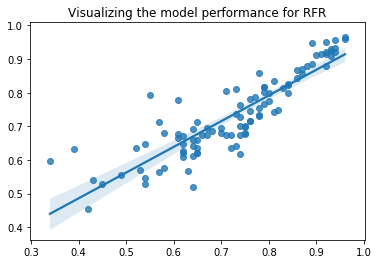

In [38]:
# Analyzing the result
sns.regplot(y_test, y_pred_rfr)
plt.title('Visualizing the model performance for RFR')

# Principal Component Analysis

In [39]:
# Implementing PCA on dataset
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

     principal component 1  principal component 2
0                -3.568375              -0.328318
1                -1.639199               0.034550
2                 0.550991              -0.720794
3                -0.345470              -1.280237
4                 2.035804               0.039366
..                     ...                    ...
495              -2.438060              -0.020361
496              -4.373303               0.306942
497              -3.910724               0.256798
498              -0.245327               2.135250
499              -1.873791               1.515791

[500 rows x 2 columns]


In [40]:
# Comparing principal dataframe with Chance of Admit
finalDf = pd.concat([principalDf, dataset[['Chance of Admit']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2  Chance of Admit
0                -3.568375              -0.328318             0.92
1                -1.639199               0.034550             0.76
2                 0.550991              -0.720794             0.72
3                -0.345470              -1.280237             0.80
4                 2.035804               0.039366             0.65
..                     ...                    ...              ...
495              -2.438060              -0.020361             0.87
496              -4.373303               0.306942             0.96
497              -3.910724               0.256798             0.93
498              -0.245327               2.135250             0.73
499              -1.873791               1.515791             0.84

[500 rows x 3 columns]


In [41]:
# Variance
pca.explained_variance_ratio_

array([0.68, 0.11])

In [42]:
x_pca=finalDf.iloc[:,:-1].values
y_pca=finalDf.iloc[:,-1].values

In [43]:
# Splitting data into training and test set for PCA
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size = 0.2, random_state = 1)

### Implementing MLR with PCA

In [44]:
regressor=LinearRegression()
regressor.fit(x_train_pca,y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred_pca=regressor.predict(x_test_pca)
# print(y_pred)
print(y_pred_pca.shape)

(100,)


### Evaluating MLR with PCA

In [46]:
# Regression metrics for MLR with PCA
pca_mlr_mse = sklearn.metrics.mean_squared_error(y_test_pca, y_pred_pca)*100
pca_mlr_rmse = math.sqrt(pca_mlr_mse)
pca_mlr_r2 = r2_score(y_test_pca,y_pred_pca)
print(pca_mlr_mse)
print(pca_mlr_rmse)
print(pca_mlr_r2)

0.4083458738280523
0.6390194627928419
0.7885423469379875


Text(0.5, 1.0, 'Visualizing the model performance for MLR with PCA')

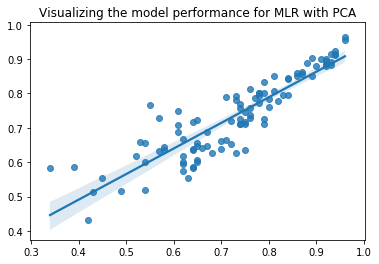

In [47]:
sns.regplot(y_test_pca, y_pred_pca)
plt.title('Visualizing the model performance for MLR with PCA')

## Implementing RFR with PCA

In [48]:
forest = RandomForestRegressor(n_estimators=200,random_state = 1)
forest.fit(x_train_pca, y_train_pca)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [49]:
y_pred_rfr_pca = forest.predict(x_test_pca)

In [50]:
# Regression metrics
pca_rfr_mse = sklearn.metrics.mean_squared_error(y_test_pca, y_pred_rfr_pca)*100
pca_rfr_rmse = math.sqrt(pca_rfr_mse)
pca_rfr_r2 = r2_score(y_test_pca,y_pred_rfr_pca)
print(pca_rfr_mse)
print(pca_rfr_rmse)
print(pca_rfr_r2)

0.49255542750000086
0.7018229317285101
0.7449353075967061


Text(0.5, 1.0, 'Visualizing the model performance for RFR with PCA')

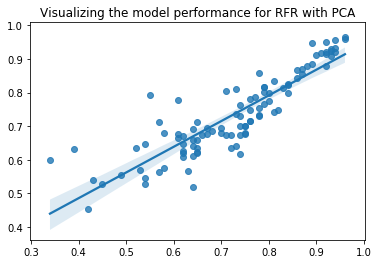

In [51]:
# Analyzing the results
sns.regplot(y_test, y_pred_rfr)
plt.title('Visualizing the model performance for RFR with PCA')